In [8]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import pandas as pd
from src.correlation_analysis import prepare_news_data, prepare_stock_data, merge_data, compute_correlation

In [11]:
news_df = pd.read_csv('../data/FNSPID_processed.csv')
news_sentiment_df = prepare_news_data(news_df)

print(news_sentiment_df.head())
print(news_sentiment_df['stock'].unique())



  stock        date  sentiment
0     A  2020-05-22   0.035714
1     A  2020-05-26   0.000000
2     A  2020-06-03   0.000000
3     A  2020-06-05   0.000000
4  AAWW  2020-06-05   0.000000
['A' 'AAWW' 'ABC' 'ACTG' 'ACY' 'ADI' 'ADSK' 'AMSWA' 'AMT' 'ANY' 'APO'
 'ARNA' 'ASML' 'ASPS' 'ASTE' 'ATAX' 'AUDC' 'AVAV' 'BC' 'BKE' 'BLIN' 'BLRX'
 'BST' 'BWEN' 'BXC' 'CALX' 'CCI' 'CDNS' 'CEVA' 'CGEN' 'CHT' 'CLSN' 'CLW'
 'CRL' 'CVTI' 'DECK' 'DHR' 'DLNG' 'DRAD' 'ECOM' 'EFOI' 'EFX' 'ENTG' 'EVER'
 'EVOK' 'FAST' 'FDS' 'FF' 'FL' 'FMS' 'FORTY' 'FOXF' 'FRC' 'GERN' 'GLOB'
 'GURE' 'HD' 'ICPT' 'IDXX' 'IIVI' 'INTL' 'IPGP' 'JD' 'JOBS' 'KLAC' 'LGND'
 'LOW' 'LPI' 'LSCC' 'LULU' 'MBUU' 'MPWR' 'MRVL' 'MTBC' 'MTSI' 'NAVB'
 'NDAQ' 'NDP' 'NDSN' 'NICE' 'NTES' 'NTG' 'NYT' 'OCUL' 'ODP' 'PENN' 'PKI'
 'POWI' 'PUK' 'RCON' 'RENN' 'RES' 'RGP' 'ROK' 'ROL' 'ROP' 'RPM' 'SAIA'
 'SBAC' 'SE' 'SEAC' 'SHW' 'SNPS' 'SPKE' 'SPLK' 'SPWH' 'SSD' 'STAA' 'TAL'
 'TMO' 'TTOO' 'TTP' 'UMC' 'UNH' 'VRSK' 'WGO' 'WSM' 'WSTG' 'XENE' 'ZBRA']


  Stock  Correlation
0  AAPL          NaN
1  AMZN          NaN
2  GOOG          NaN
3  META          NaN
4  MSFT          NaN
5  NVDA          NaN
6  TSLA          NaN


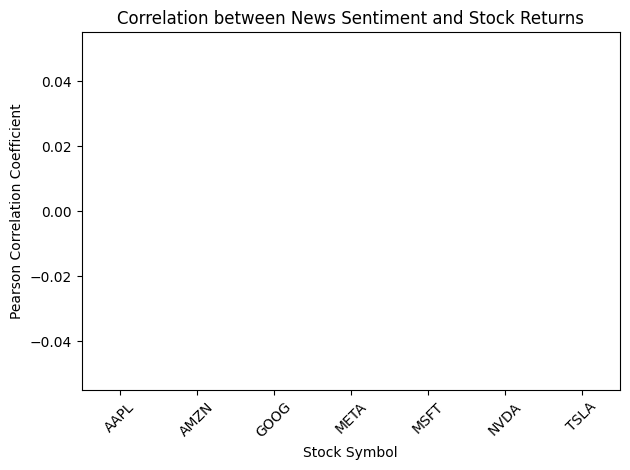

In [10]:
stock_symbols = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
results = []

for symbol in stock_symbols:
    stock_df = pd.read_csv(f'../data/yfinance_data/{symbol}_historical_data.csv')
    stock_returns_df = prepare_stock_data(stock_df)
    merged_df = merge_data(news_sentiment_df, stock_returns_df, symbol)
    correlation = compute_correlation(merged_df)
    results.append({'Stock': symbol, 'Correlation': correlation})
results_df = pd.DataFrame(results)
print(results_df)

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Stock', y='Correlation', data=results_df)
plt.title('Correlation between News Sentiment and Stock Returns')
plt.ylabel('Pearson Correlation Coefficient')
plt.xlabel('Stock Symbol')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
results_df = pd.DataFrame(results)
print(results_df)


  Stock  Correlation
0  AAPL          NaN
1  AMZN          NaN
2  GOOG          NaN
3  META          NaN
4  MSFT          NaN
5  NVDA          NaN
6  TSLA          NaN


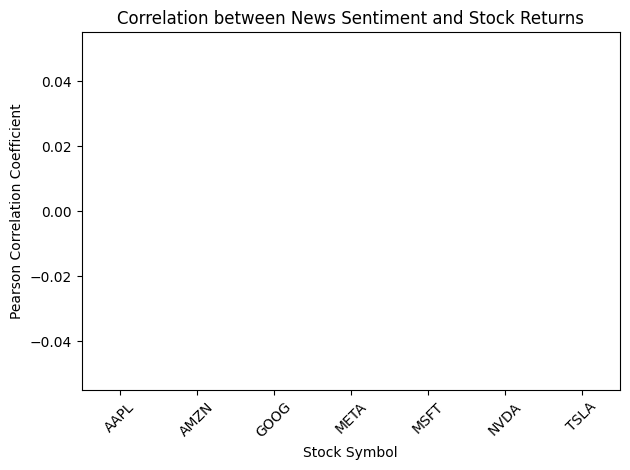

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Stock', y='Correlation', data=results_df)
plt.title('Correlation between News Sentiment and Stock Returns')
plt.ylabel('Pearson Correlation Coefficient')
plt.xlabel('Stock Symbol')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
